<a href="https://colab.research.google.com/github/nicholasolmedo/TestProject/blob/main/homework_1_(9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from random import random
from time import time
import matplotlib.pyplot as plt
from statistics import median

%matplotlib inline

# **Setup**

In class, we saw two algorithms for computing the maximum element of a list.  Here's a version of the fast algorithm and the slow algorithm.



In [3]:
def fast_max(L):
  cur_max = float('-inf')

  #run through all elements of L updating cur_max as we go
  for x in L: 
    if x > cur_max:
      cur_max = x
  return cur_max

def slow_max(L):
  for x in L:
    x_biggest = True  #we'll operate under the assumption that x is biggest until proven otherwise
    for y in L:
      if y > x:
        x_biggest = False
        break #x isn't the biggest. Move on to the next x
    if x_biggest:
      return x

Let's time these algorithms.  We'll also time the built-in max function in Python, which is just called max.


In [4]:
def time_max(max_fn, L):
  '''Time the function max_fn applied to a list L'''
  start = time()   #get the current time (in seconds)
  max_fn(L)        #run max_fn on L (we don't care about the output, we're just seeing how long it takes)
  end = time()                       
  elapsed = end - start
  return elapsed

def random_list(N):
  '''Get a random list of length N'''
  return [random() for _ in range(N)]

Next we compute the runtimes of our three algorithms on random lists of varying lengths.  Then we make a plot, where we plot the runtimes against the list lengths.

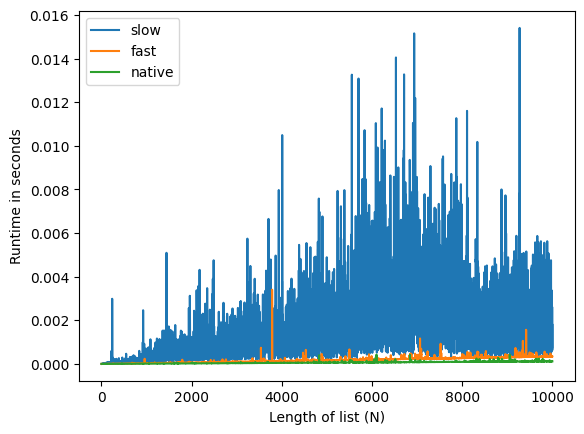

In [ ]:
list_lengths = range(1,10000,2)  #1 to 1000 in steps of 2
slow_times =   [time_max(slow_max, random_list(N)) for N in list_lengths]
fast_times =   [time_max(fast_max, random_list(N)) for N in list_lengths]
native_times = [time_max(max, random_list(N)) for N in list_lengths]

plt.plot(list_lengths, slow_times,   label='slow')
plt.plot(list_lengths, fast_times,   label='fast')
plt.plot(list_lengths, native_times, label='native')
plt.xlabel('Length of list (N)')
plt.ylabel('Runtime in seconds')
plt.legend()
plt.show()

This plot is a little noisy.  Let's clean things up.  First of all, let's do a few different trial runs for every value of N and take the median.

In [ ]:
def median_runtime(max_fn, N, trials):
  return median([time_max(max_fn, random_list(N)) for _ in range(trials)])

# **Your Work** #


**Using the function above, make a nicer plot that looks less noisy and gives a cleaner picture of what's going on.  You might also go up to larger values of $N$.**


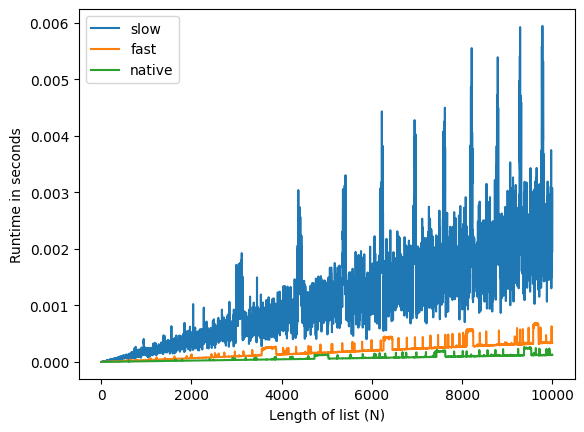

In [ ]:
list_lengths = range(1,10000,2) 

slow_times2 = [median_runtime(slow_max, N, 15) for N in list_lengths]
fast_times2 = [median_runtime(fast_max, N, 15) for N in list_lengths]
native_times2 = [median_runtime(max, N, 15) for N in list_lengths]

plt.plot(list_lengths, slow_times2,   label='slow')
plt.plot(list_lengths, fast_times2,   label='fast')
plt.plot(list_lengths, native_times2, label='native')
plt.xlabel('Length of list (N)')
plt.ylabel('Runtime in seconds')
plt.legend()
plt.show()

**Based on your plot, what does the runtime of each algorithm appear to be?**

**You've likely noticed that `slow_max` doesn't look quadratic.  What do you think is going on?**



**Suppose that an algorithm runs in $\Theta(N^c)$ time.  What does $c$ correspond to on a [log-log plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot)?**

**Make a new plot which convincingly demonstrates that `slow_max` can have quadratic runtime in the worst case. (You might wish to use `plt.loglog()` although you don't have to.)**

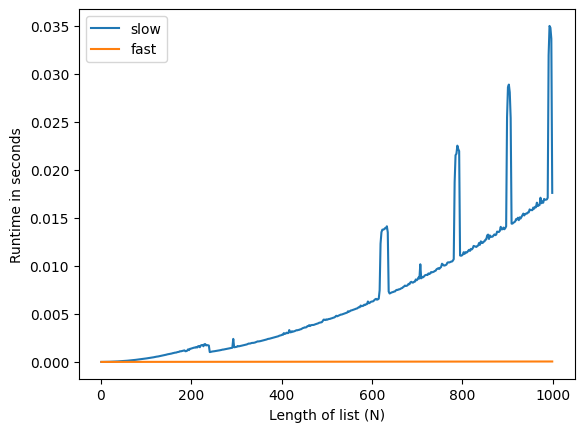

In [5]:
def max_list(N):
    return list(range(1,N))

def median_runtime2(max_fn, N, trials):
    return median([time_max(max_fn, max_list(N)) for _ in range(trials)])


list_lengths = range(1,1000,2) 

slow_times2 = [median_runtime2(slow_max, N, 15) for N in list_lengths]
fast_times2 = [median_runtime2(fast_max, N, 15) for N in list_lengths]


plt.plot(list_lengths, slow_times2,   label='slow')
plt.plot(list_lengths, fast_times2,   label='fast')

plt.xlabel('Length of list (N)')
plt.ylabel('Runtime in seconds')
plt.legend()
plt.show()

**Which of these three max functions should you use in real life?**